<a href="https://colab.research.google.com/github/megnidio/DPR/blob/main/Medecinal_plants_with_real_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statistics
import scipy.stats


In [ ]:
#Save Excel file as CSV via Python
df = pd.read_excel('/content/sample_data/plantesmédicinales.xlsx')
df.to_csv('plantesmédicinales_data.csv')
/content/sample_data/plantesmédicinales_data.csv


In [5]:
df_medecinalplants = pd.read_csv('/content/sample_data/plantesmédicinales_data.csv')
#df_medecinalplants = pd.read_csv('/plantesmédicinales_data.csv', sep=r'\s*,\s*',
                          # header=0, encoding='utf-8-sig')
#df_inoculation.index = df_inoculation.index.str.strip()
#Normalise root percentage column
#cols_to_norm = ['Root percentage']
#df_rootinoculation[cols_to_norm] = StandardScaler().fit_transform(df_rootinoculation[cols_to_norm])
df_medecinalplants.drop(df_medecinalplants.columns[[0]], axis=1, inplace=True)
df_medecinalplants.head(10)

,Pays d’origine,Age,Sexe,Ethnie,Religion,Niveau d’étude,Niveau de revenu(CFA),Utilisation des plantes(use)
0,Bénin,20 – 30,Masculin,Fon,Christianisme,Universitaire,100000 - 300000,Oui
1,Bénin,20 – 30,Masculin,Goun,Protestante,Universitaire,300000-500000,Oui
2,Bénin,20 – 30,Masculin,Nagot,Christianisme,Universitaire,100000 - 300000,Oui
3,Cameroun,30 – 40,Féminin,Bamiléké,Ouest,Universitaire,100000 - 300000,Oui
4,Cameroun,40 – 50,Masculin,Bamiléké,Catholique,Universitaire,300000-500000,Non
5,Cameroun,20 – 30,Masculin,Bamiléké,Témoin de Jéhovah,Universitaire,< 100000,Oui
6,Cameroun,40 – 50,Masculin,Bamiléké,Deistes,Universitaire,300000-500000,Oui
7,Cameroun,40 – 50,Féminin,Bamiléké,Ouest,Universitaire,< 100000,Oui
8,Bénin,20 – 30,Féminin,Fon,Christianisme,Universitaire,< 100000,Oui
9,Bénin,20 – 30,Masculin,Anii,Islamique,Universitaire,< 100000,Oui


In [31]:
df_medecinalplants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Pays d’origine                59 non-null     object
 1   Age                           59 non-null     object
 2   Sexe                          59 non-null     object
 3   Ethnie                        59 non-null     object
 4   Religion                      58 non-null     object
 5   Niveau d’étude                59 non-null     object
 6   Niveau de revenu(CFA)         59 non-null     object
 7   Utilisation des plantes(use)  59 non-null     object
dtypes: object(8)
memory usage: 3.8+ KB


In [7]:
# Descriptive statistics
df_medecinalplants.describe()

,Pays d’origine,Age,Sexe,Ethnie,Religion,Niveau d’étude,Niveau de revenu(CFA),Utilisation des plantes(use)
count,59,59,59,59,58,59,59,59
unique,7,4,2,24,20,2,5,2
top,Bénin,20 – 30,Féminin,Fon,Catholique,Universitaire,< 100000,Oui
freq,29,38,33,16,17,52,28,49


In [8]:
# Check for missing values
df_medecinalplants.isnull().sum()

Pays d’origine                  0
Age                             0
Sexe                            0
Ethnie                          0
Religion                        1
Niveau d’étude                  0
Niveau de revenu(CFA)           0
Utilisation des plantes(use)    0
dtype: int64

In [13]:
#change all categorical columns in df_medecinalplants to numerical
for col in df_medecinalplants.columns:
  if df_medecinalplants[col].dtype == 'object':
    df_medecinalplants[col] = pd.Categorical(df_medecinalplants[col]).codes
df_medecinalplants.head(10)

,Pays d’origine,Age,Sexe,Ethnie,Religion,Niveau d’étude,Niveau de revenu(CFA),Utilisation des plantes(use)
0,3,0,1,13,7,1,0,1
1,3,0,1,15,15,1,1,1
2,3,0,1,20,7,1,0,1
3,5,1,0,8,11,1,0,1
4,5,2,1,8,2,1,1,0
5,5,0,1,8,18,1,4,1
6,5,2,1,8,8,1,1,1
7,5,2,0,8,12,1,4,1
8,3,0,0,13,6,1,4,1
9,3,0,1,1,9,1,4,1


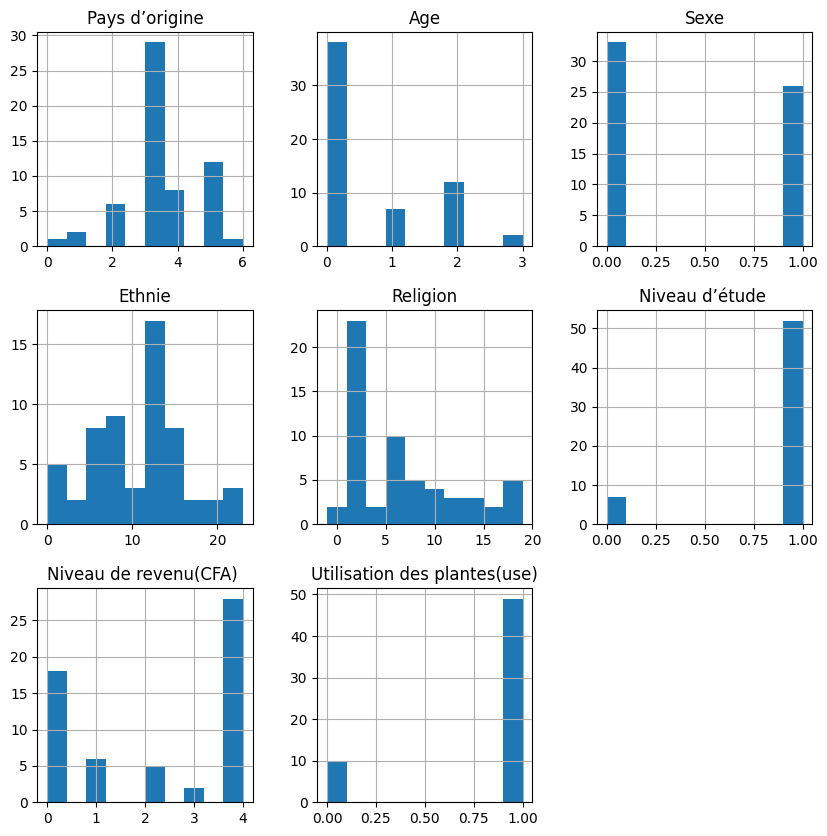

In [11]:
# Explore data distribution
df_medecinalplants.hist(figsize=(10,10))
plt.show()

In [16]:
#change all categorical columns in df_medecinalplants to numerical using one hot encoding
df_medecinalplants = pd.get_dummies(df_medecinalplants, columns=[col for col in df_medecinalplants.columns if df_medecinalplants[col].dtype == 'object'])
df_medecinalplants.head(10)

,Pays d’origine,Age,Sexe,Ethnie,Religion,Niveau d’étude,Niveau de revenu(CFA),Utilisation des plantes(use)
0,3,0,1,13,7,1,0,1
1,3,0,1,15,15,1,1,1
2,3,0,1,20,7,1,0,1
3,5,1,0,8,11,1,0,1
4,5,2,1,8,2,1,1,0
5,5,0,1,8,18,1,4,1
6,5,2,1,8,8,1,1,1
7,5,2,0,8,12,1,4,1
8,3,0,0,13,6,1,4,1
9,3,0,1,1,9,1,4,1


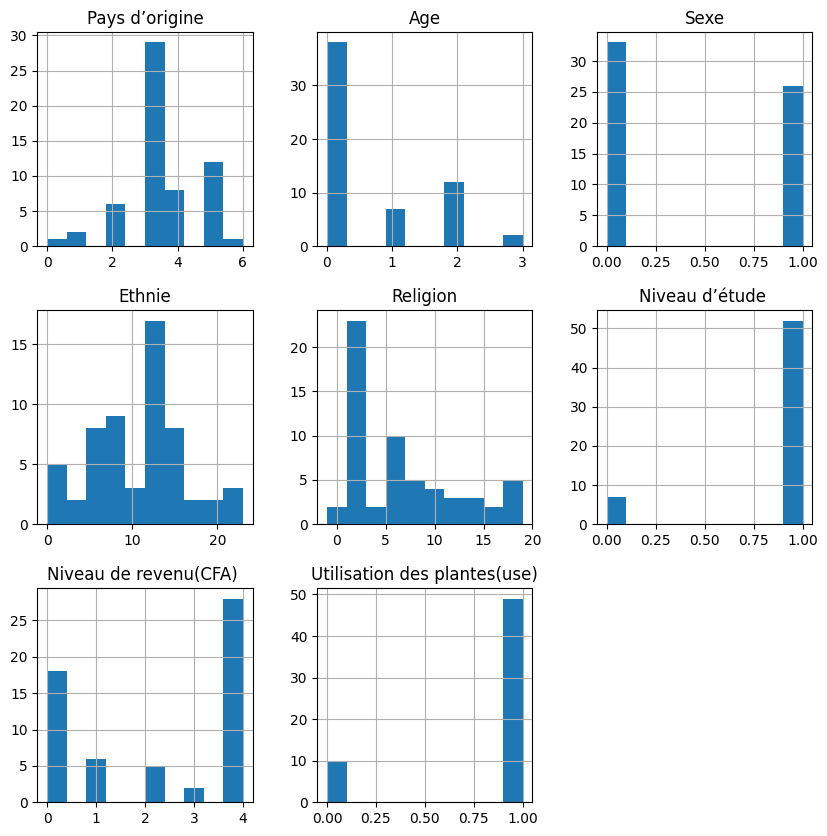

In [15]:
# Explore data distribution
df_medecinalplants.hist(figsize=(10,10))
plt.show()

In [17]:
df_medecinalplants.describe(include='all')

,Pays d’origine,Age,Sexe,Ethnie,Religion,Niveau d’étude,Niveau de revenu(CFA),Utilisation des plantes(use)
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,3.372881,0.627119,0.440678,10.864407,6.389831,0.881356,2.271186,0.830508
std,1.172947,0.926586,0.500730,5.396224,5.521172,0.326145,1.798759,0.378406
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,6.500000,2.000000,1.000000,0.000000,1.000000
50%,3.000000,0.000000,0.000000,13.000000,6.000000,1.000000,3.000000,1.000000
75%,4.000000,1.000000,1.000000,13.500000,10.000000,1.000000,4.000000,1.000000
max,6.000000,3.000000,1.000000,23.000000,19.000000,1.000000,4.000000,1.000000


In [18]:
# Calculate the mean, median, and standard deviation of each column
for col in df_medecinalplants.columns:
  mean = df_medecinalplants[col].mean()
  median = df_medecinalplants[col].median()
  std = df_medecinalplants[col].std()
  print(f"Column {col}:")
  print(f"  Mean: {mean:.2f}")
  print(f"  Median: {median:.2f}")
  print(f"  Standard deviation: {std:.2f}")

Column Pays d’origine:
  Mean: 3.37
  Median: 3.00
  Standard deviation: 1.17
Column Age:
  Mean: 0.63
  Median: 0.00
  Standard deviation: 0.93
Column Sexe:
  Mean: 0.44
  Median: 0.00
  Standard deviation: 0.50
Column Ethnie:
  Mean: 10.86
  Median: 13.00
  Standard deviation: 5.40
Column Religion:
  Mean: 6.39
  Median: 6.00
  Standard deviation: 5.52
Column Niveau d’étude :
  Mean: 0.88
  Median: 1.00
  Standard deviation: 0.33
Column Niveau de revenu(CFA) :
  Mean: 2.27
  Median: 3.00
  Standard deviation: 1.80
Column Utilisation des plantes(use):
  Mean: 0.83
  Median: 1.00
  Standard deviation: 0.38


In [19]:
# Calculate the correlation between each pair of columns
corr_matrix = df_medecinalplants.corr()
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                              Pays d’origine       Age      Sexe    Ethnie  \
Pays d’origine                      1.000000  0.526733 -0.049755 -0.484915   
Age                                 0.526733  1.000000 -0.234301 -0.251662   
Sexe                               -0.049755 -0.234301  1.000000 -0.009409   
Ethnie                             -0.484915 -0.251662 -0.009409  1.000000   
Religion                            0.200803  0.133380  0.105174 -0.024815   
Niveau d’étude                     -0.107709 -0.377127  0.114521  0.118056   
Niveau de revenu(CFA)              -0.293910 -0.269310 -0.000973 -0.063645   
Utilisation des plantes(use)       -0.243605 -0.085011 -0.235966  0.191196   

                              Religion  Niveau d’étude   \
Pays d’origine                0.200803        -0.107709   
Age                           0.133380        -0.377127   
Sexe                          0.105174         0.114521   
Ethnie                       -0.024815   

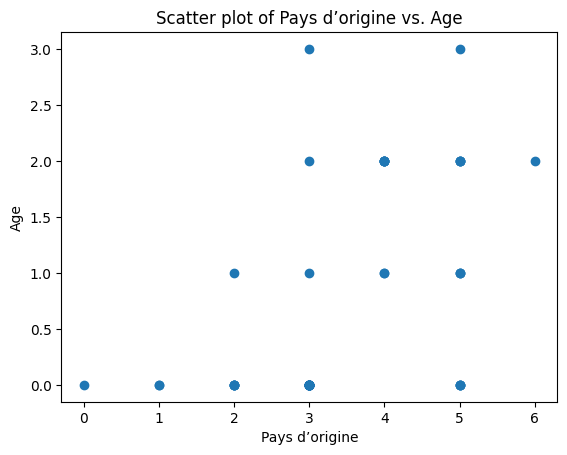

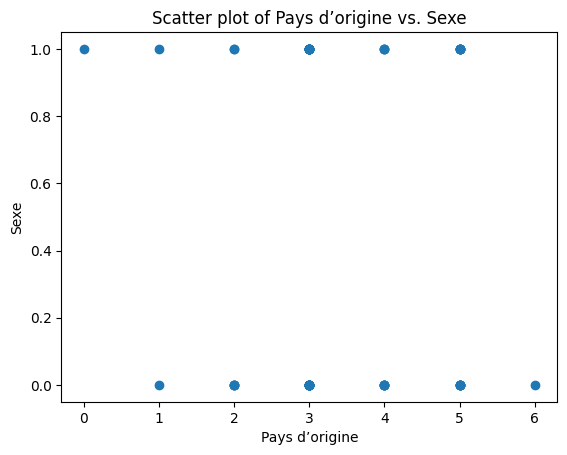

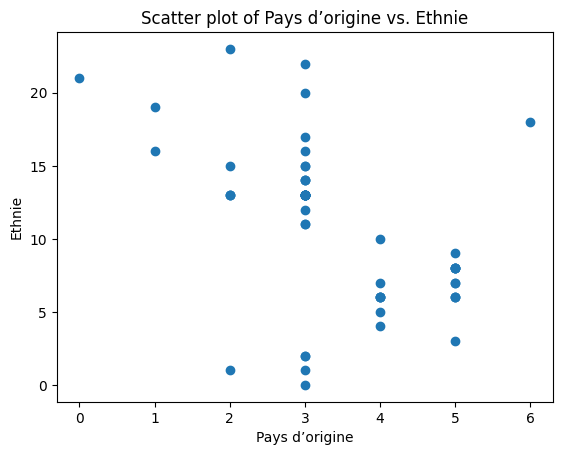

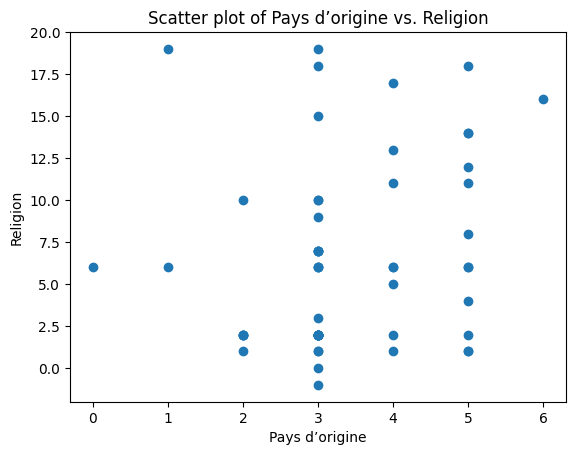

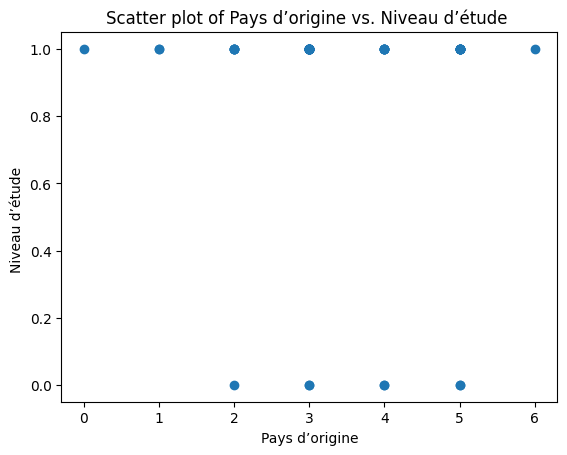

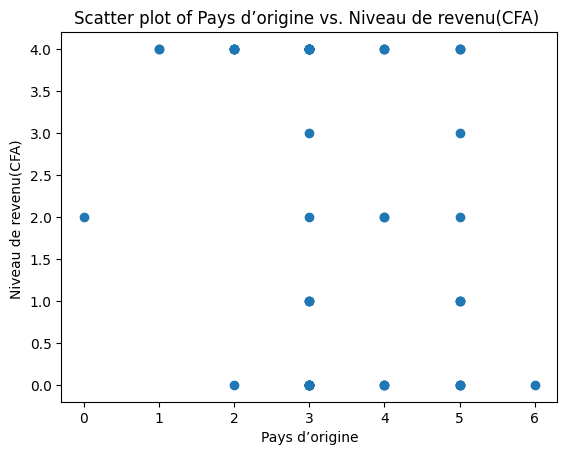

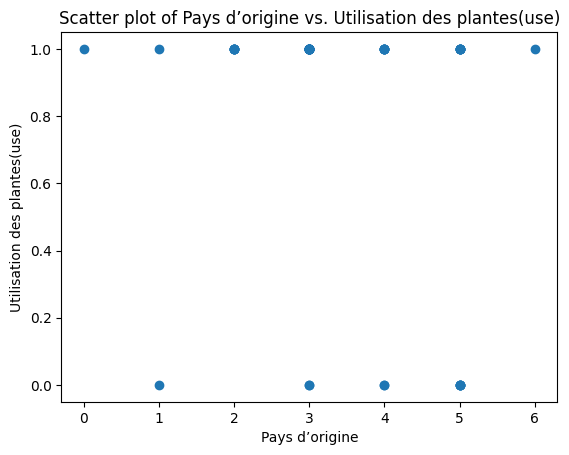

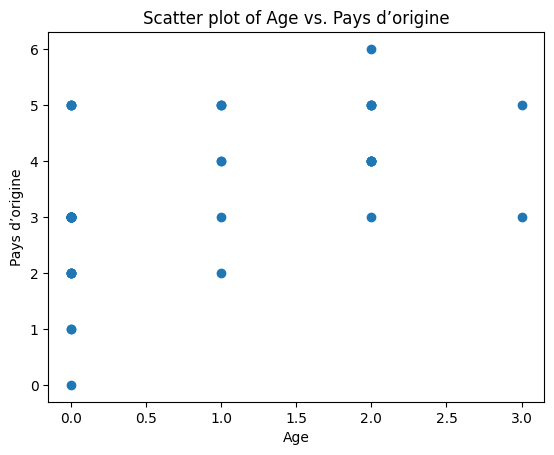

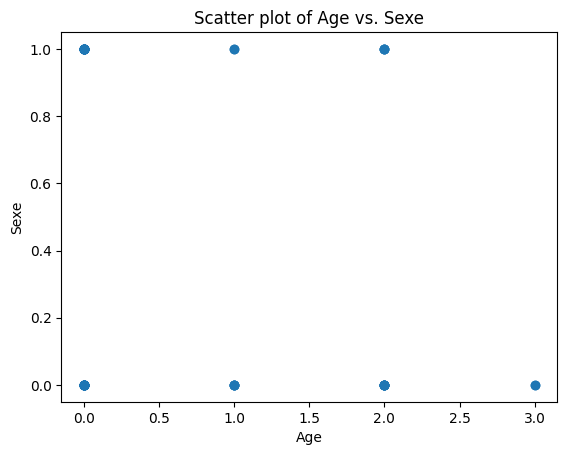

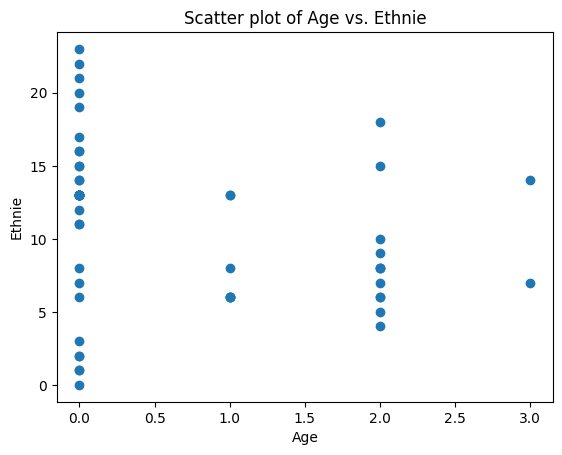

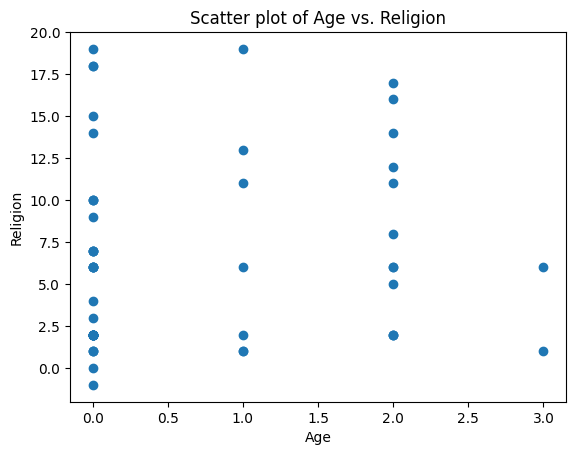

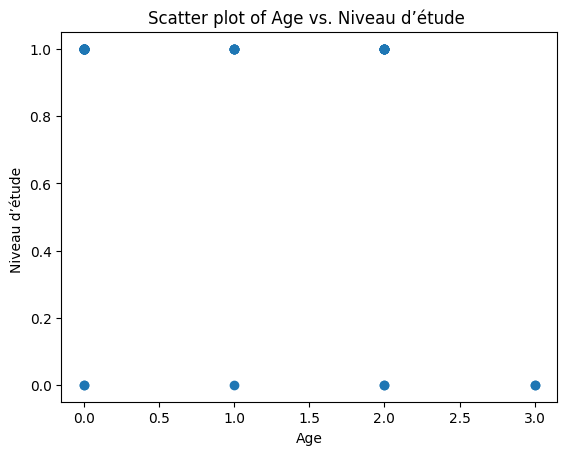

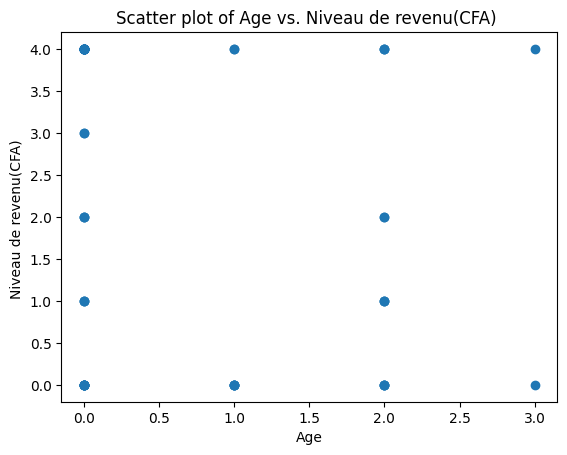

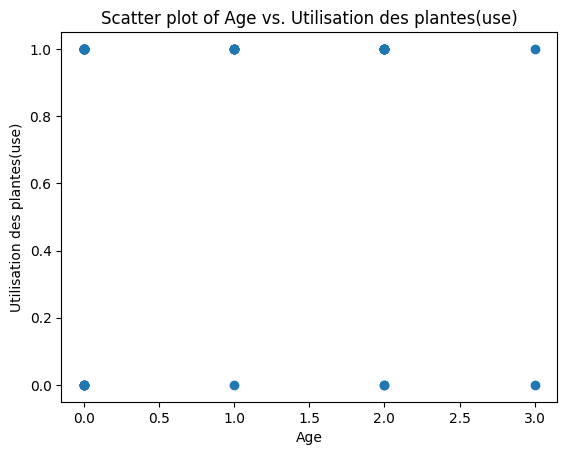

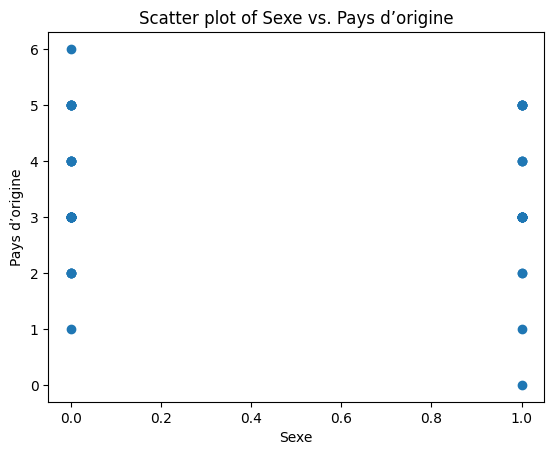

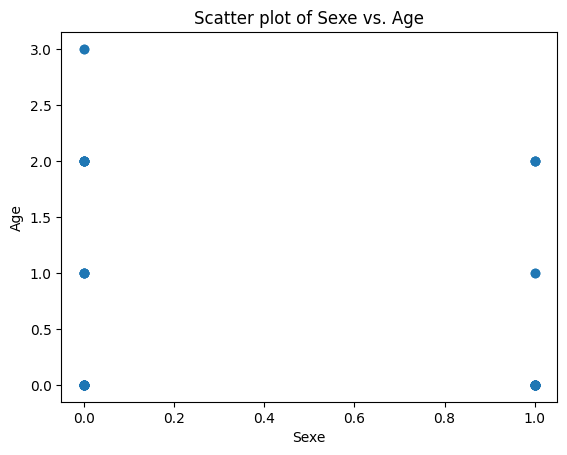

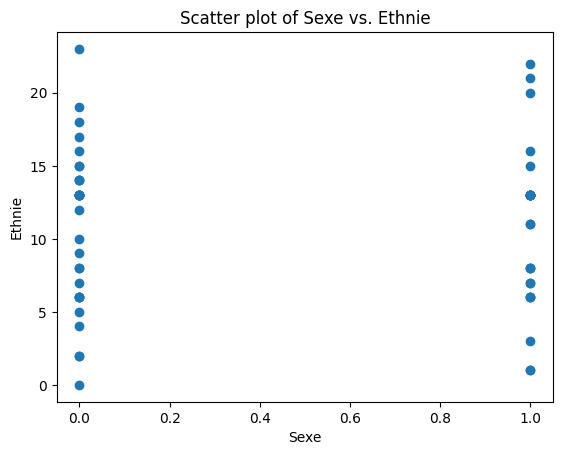

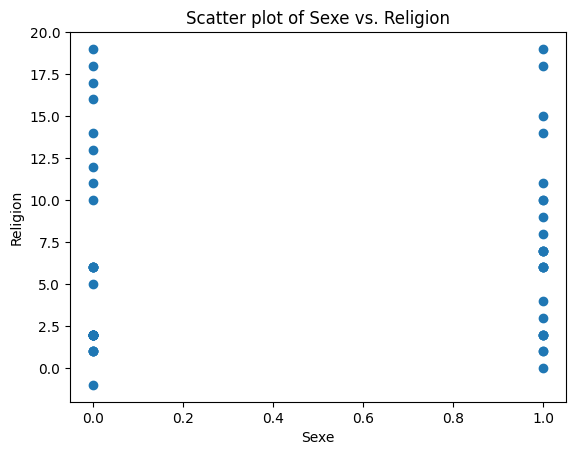

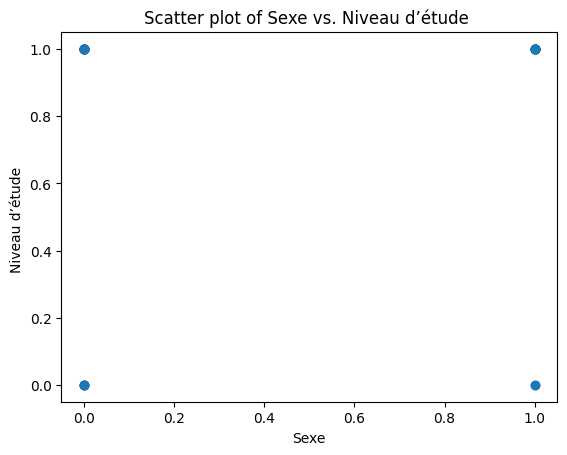

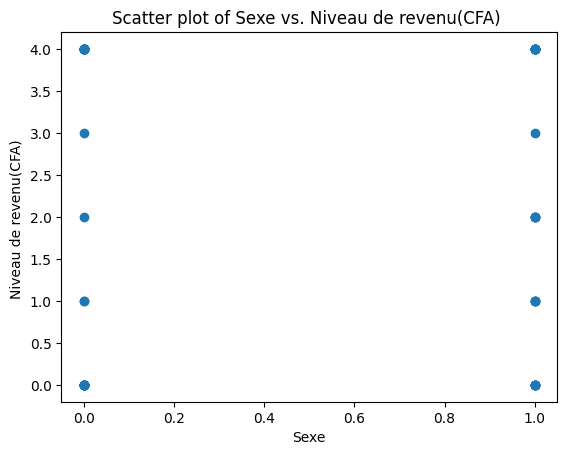

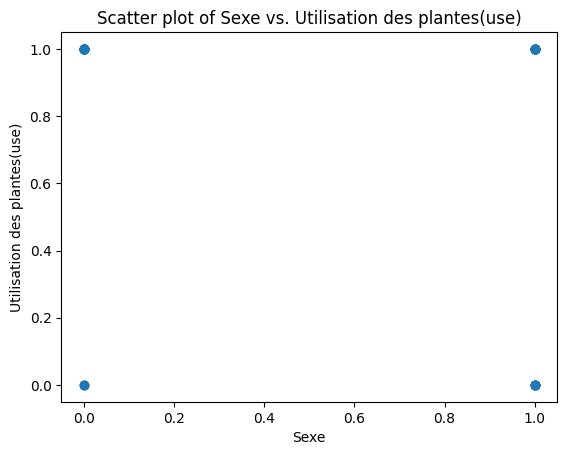

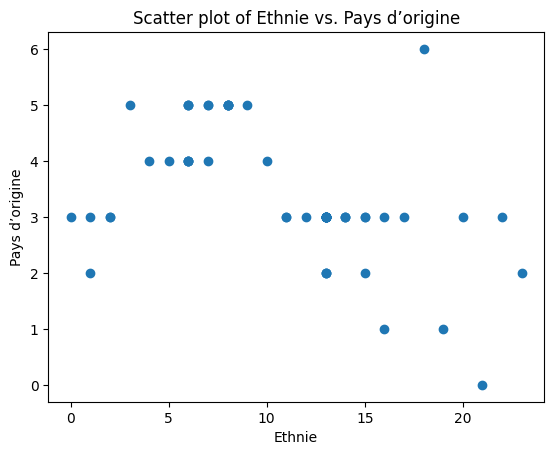

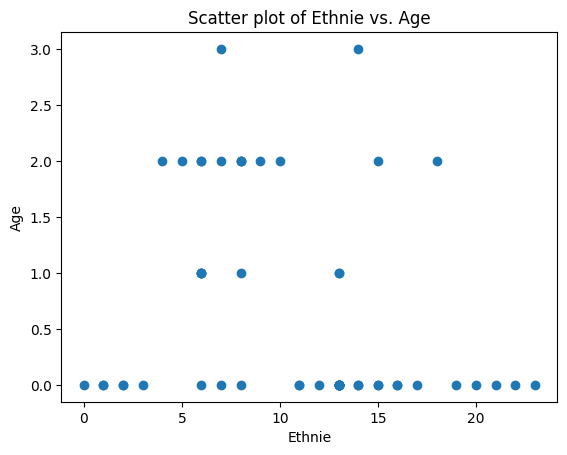

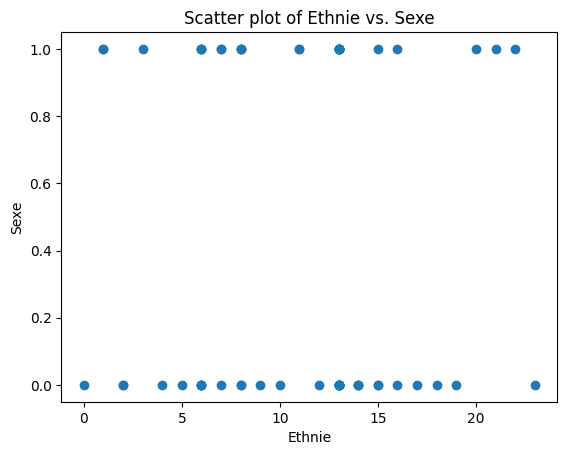

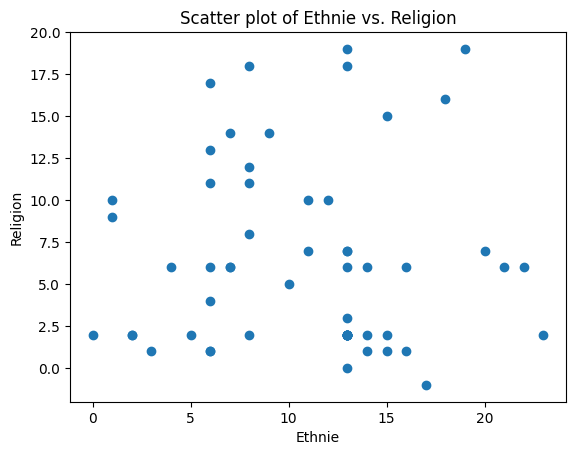

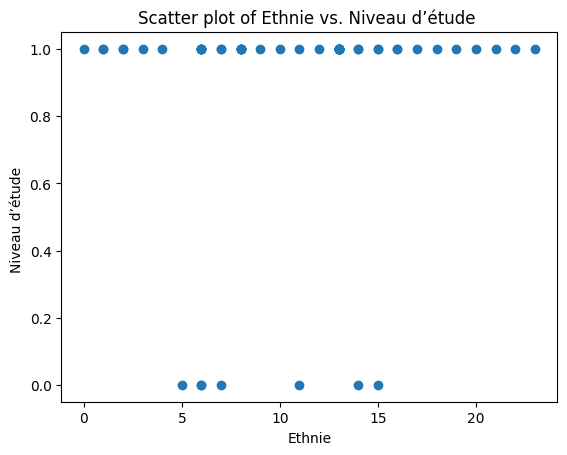

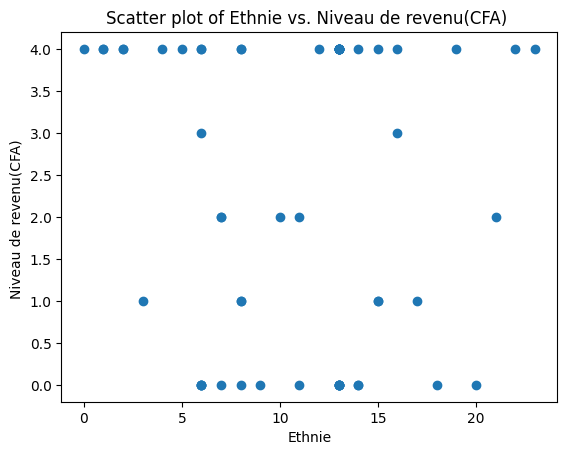

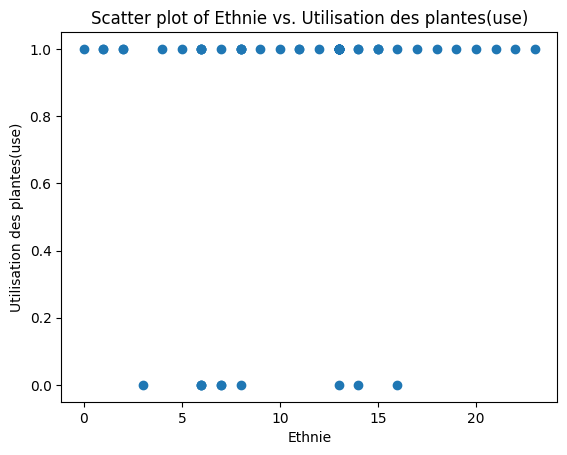

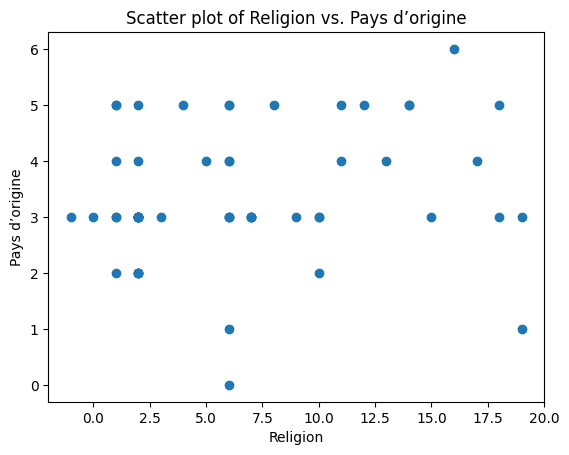

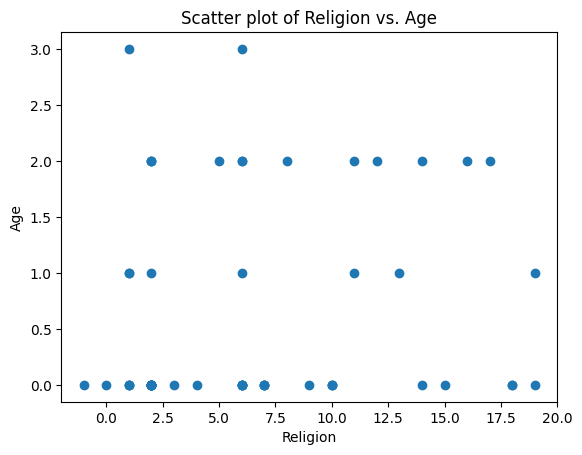

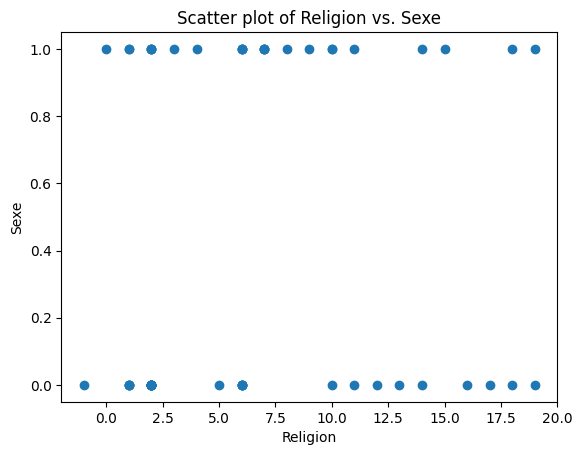

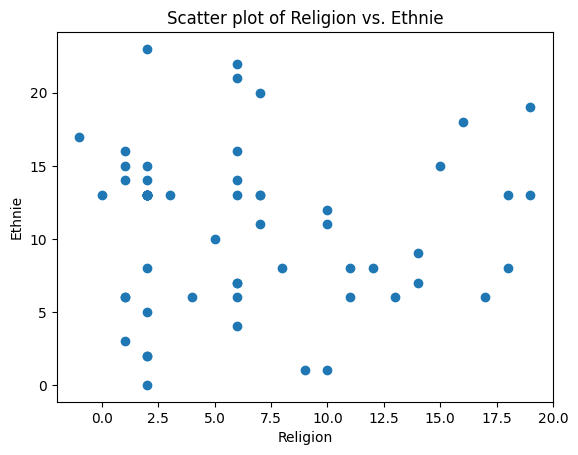

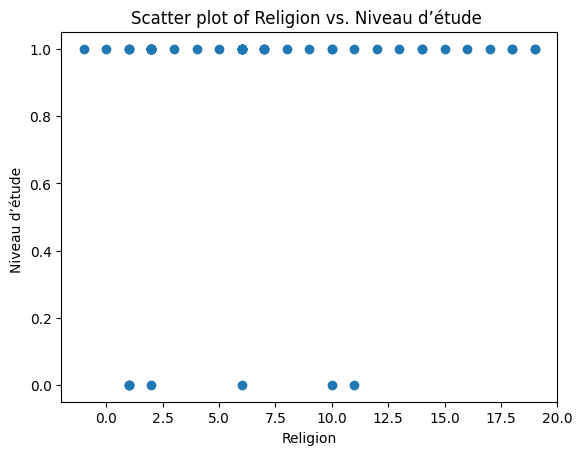

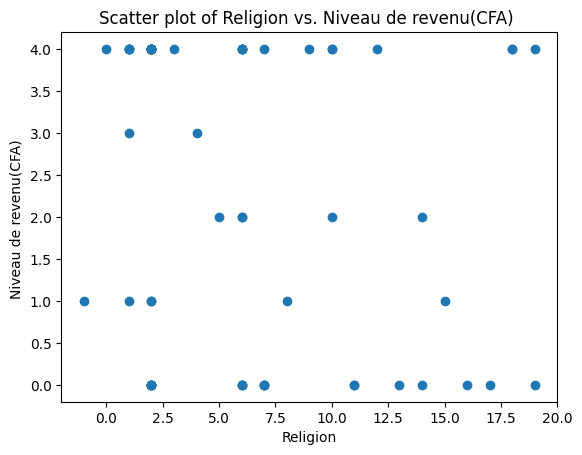

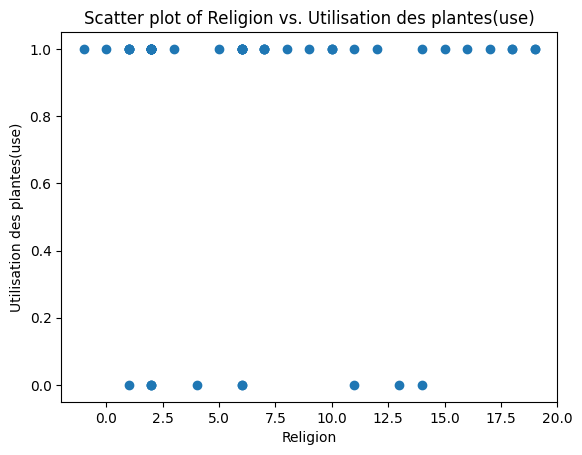

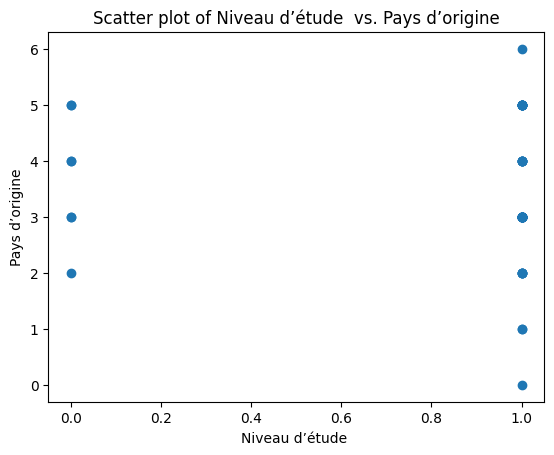

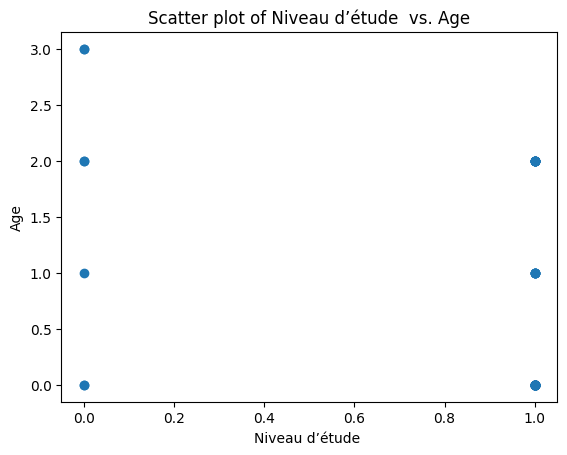

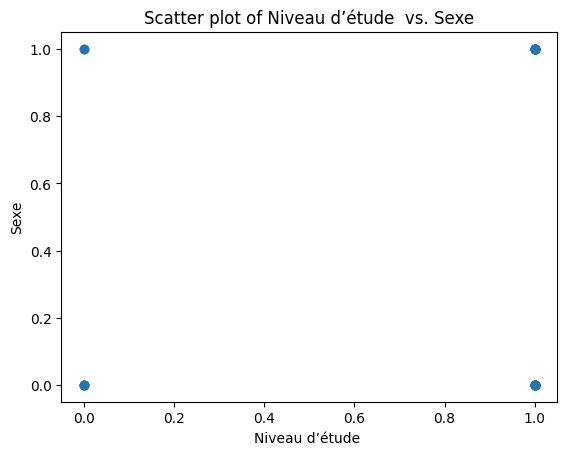

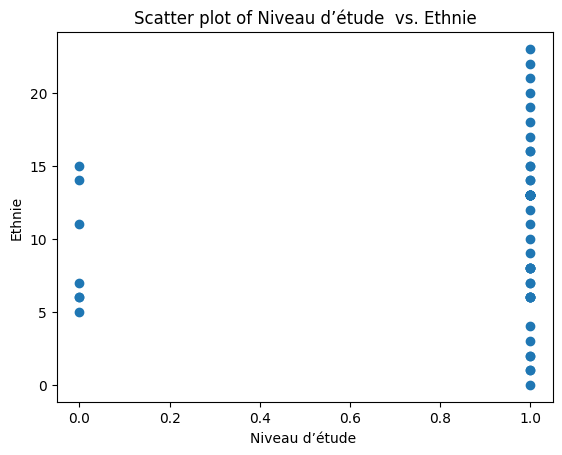

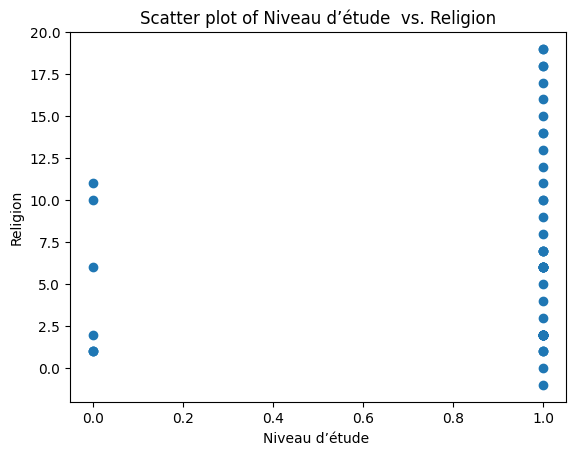

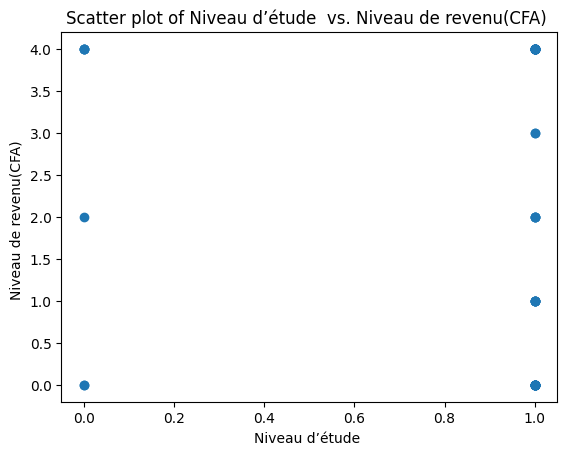

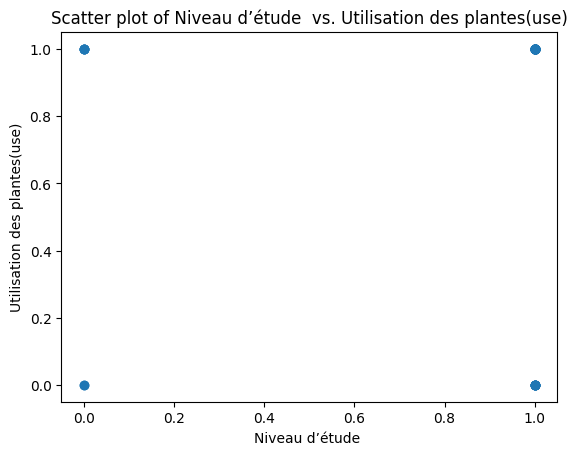

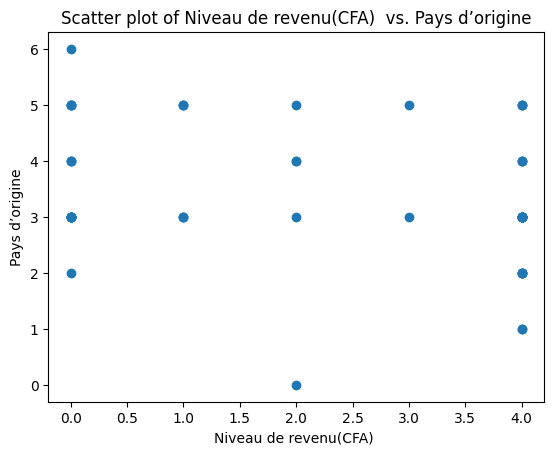

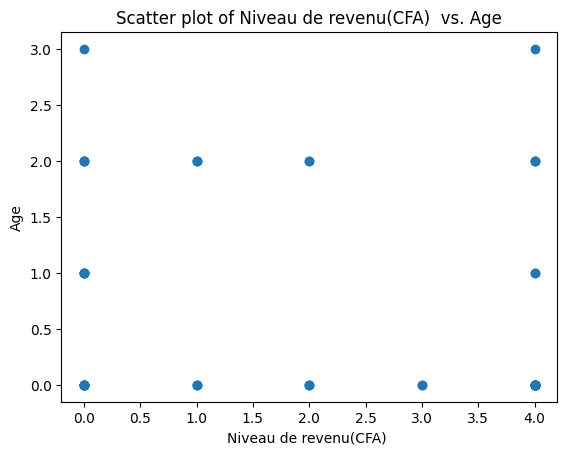

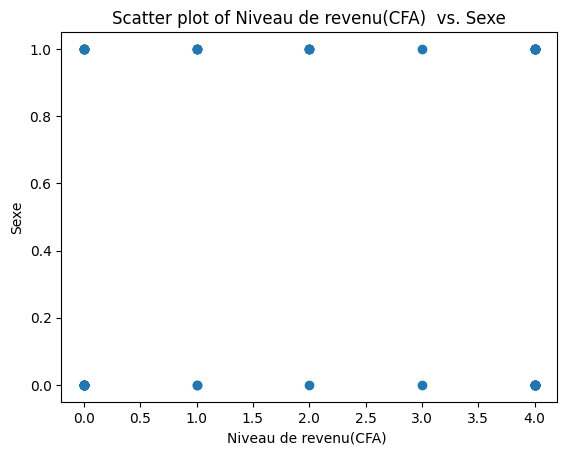

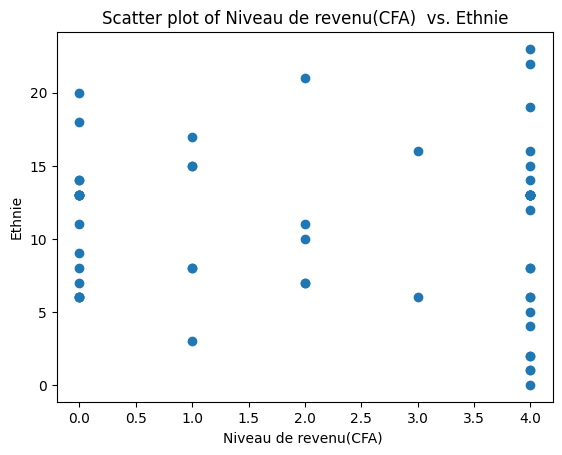

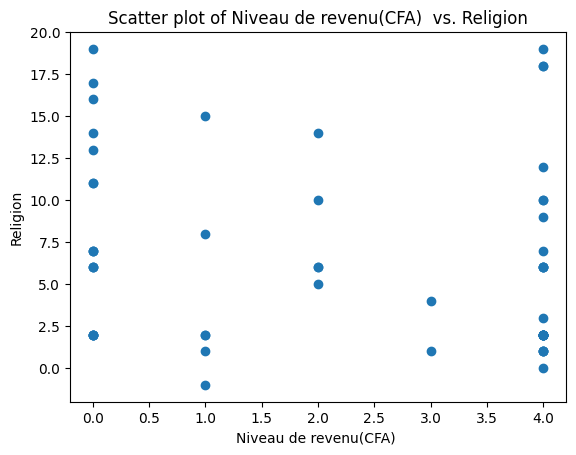

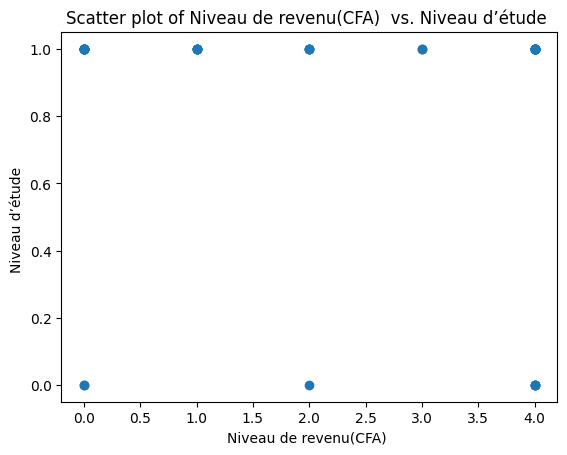

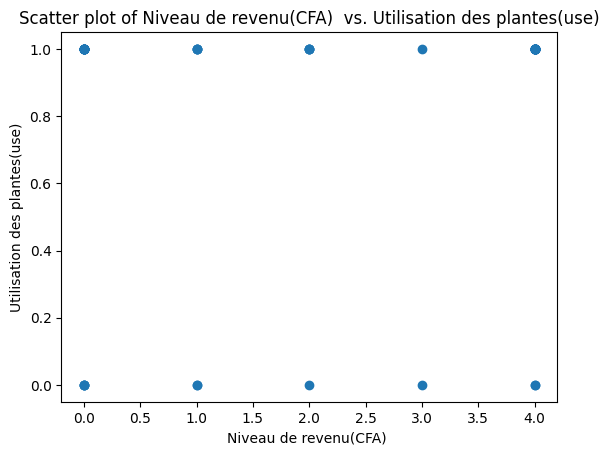

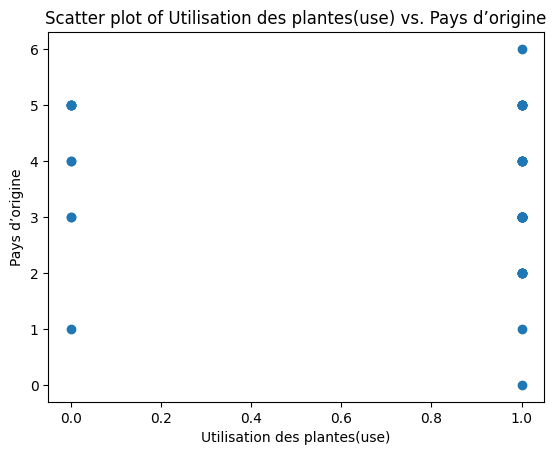

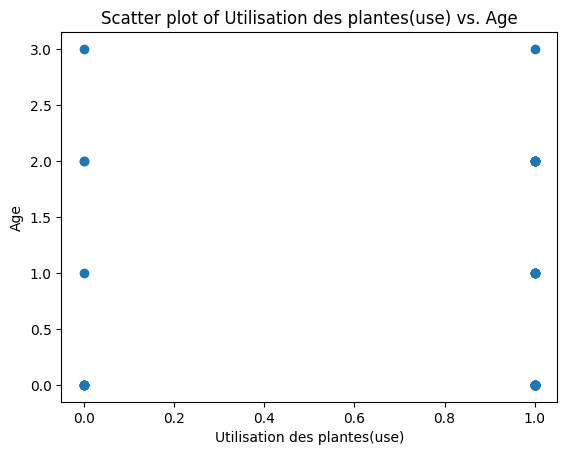

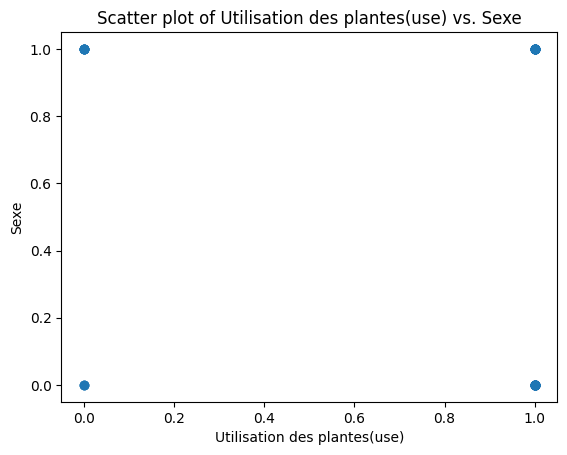

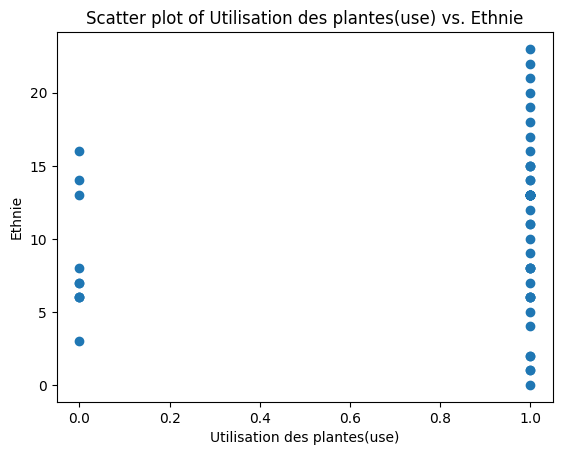

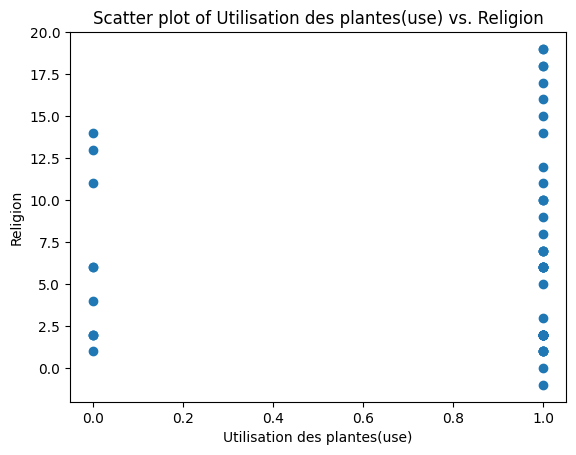

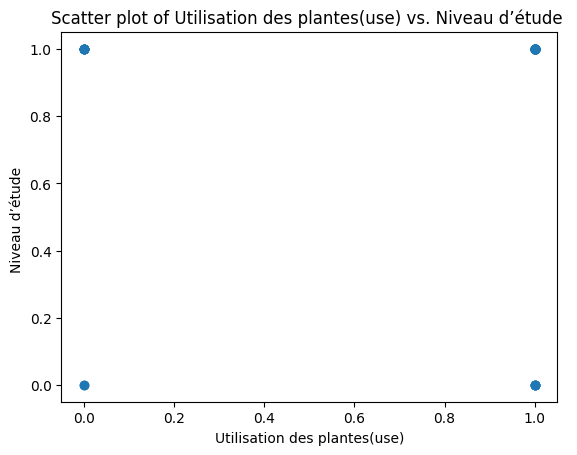

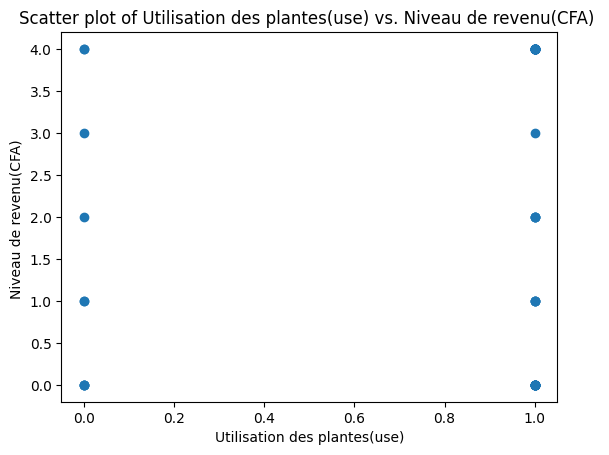

In [20]:
# Create a scatter plot for each pair of columns
for col1 in df_medecinalplants.columns:
  for col2 in df_medecinalplants.columns:
    if col1 != col2:
      plt.scatter(df_medecinalplants[col1], df_medecinalplants[col2])
      plt.xlabel(col1)
      plt.ylabel(col2)
      plt.title(f"Scatter plot of {col1} vs. {col2}")
      plt.show()

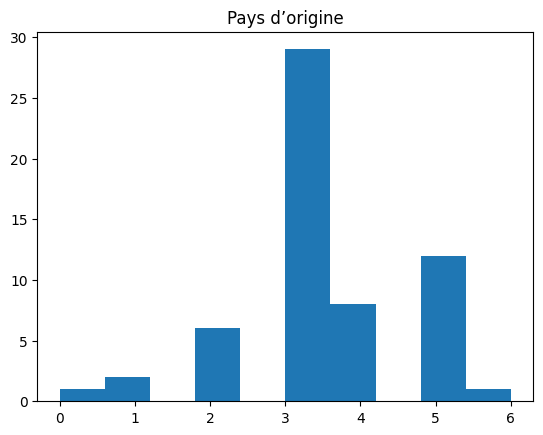

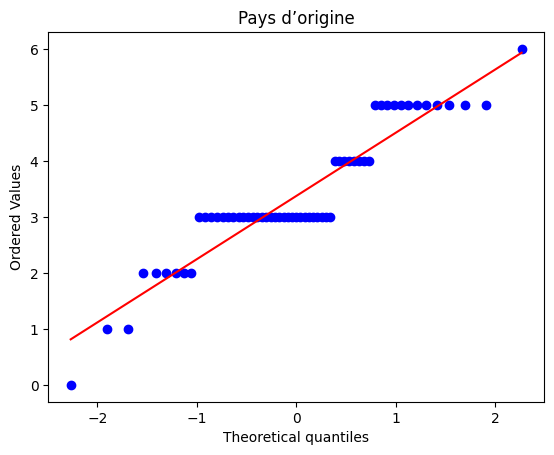

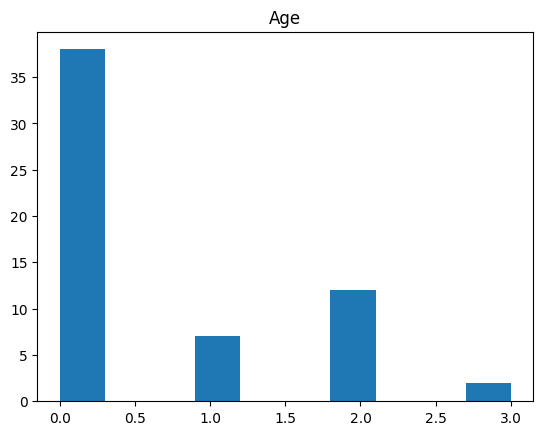

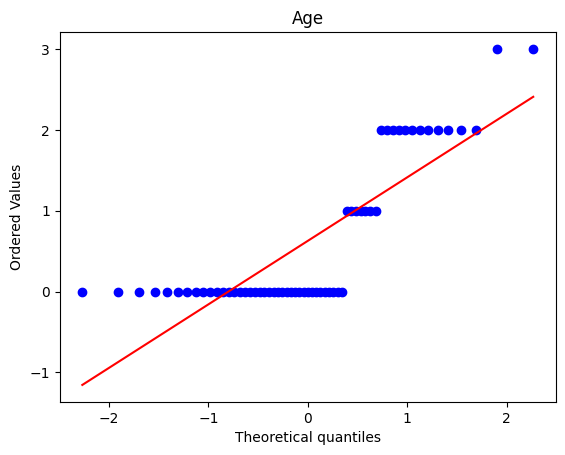

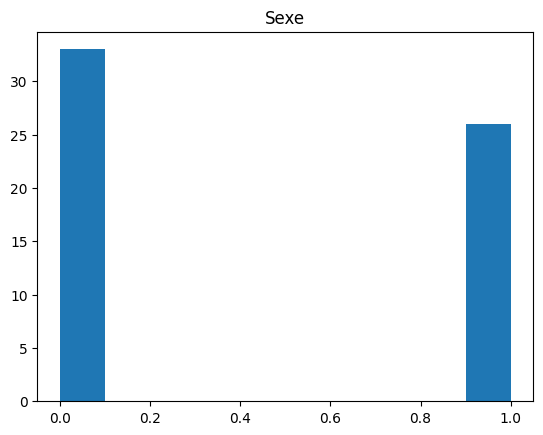

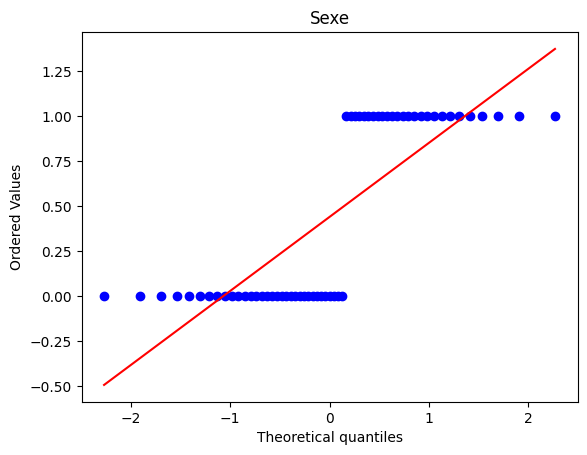

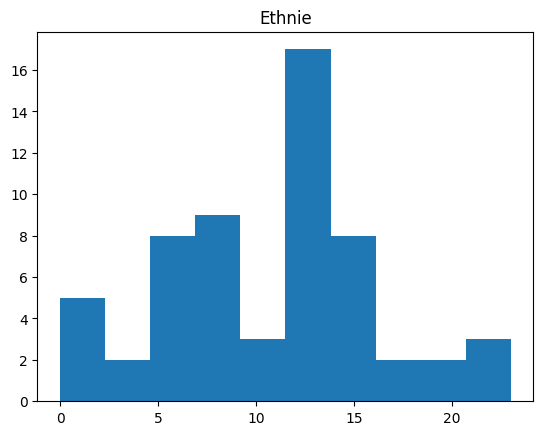

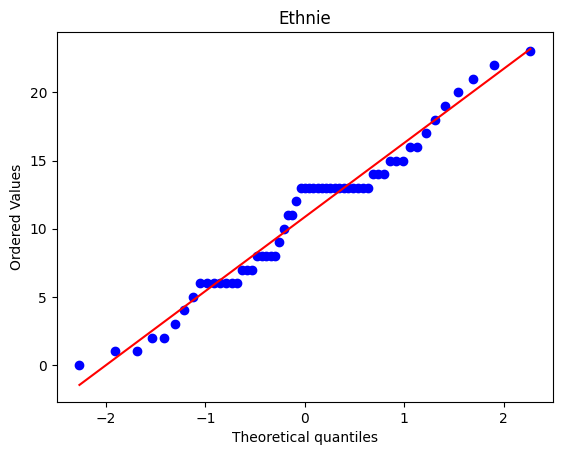

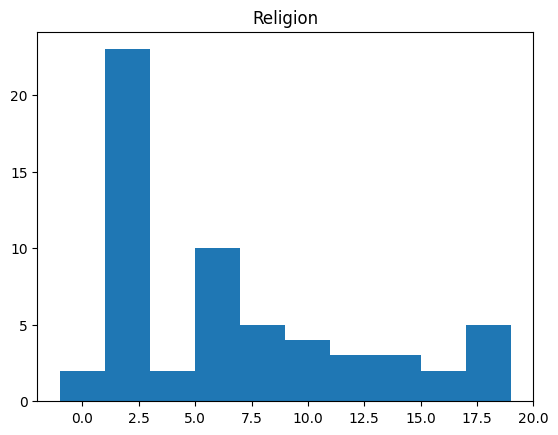

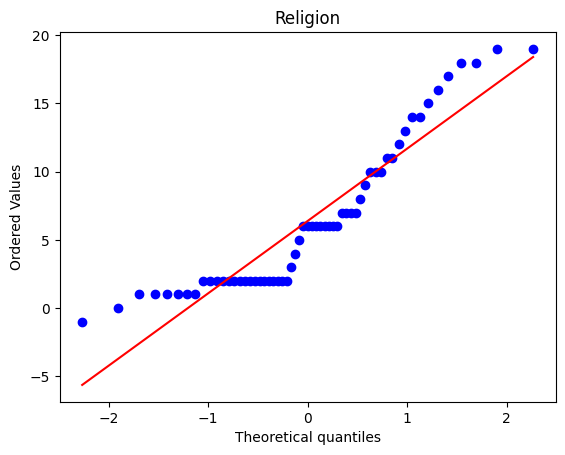

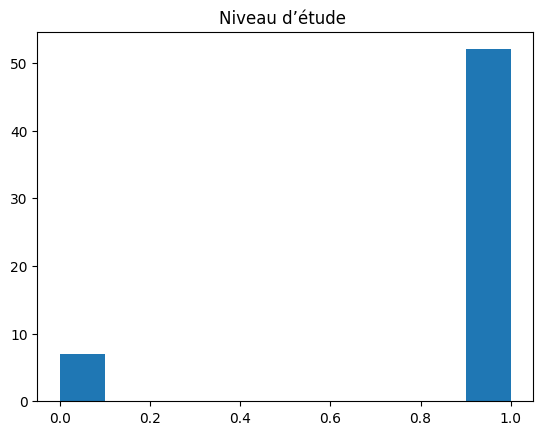

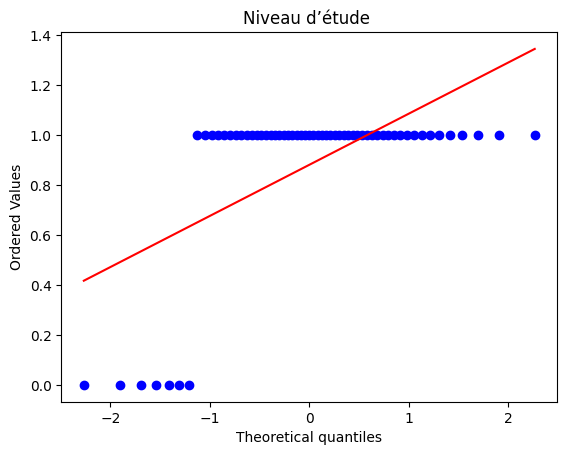

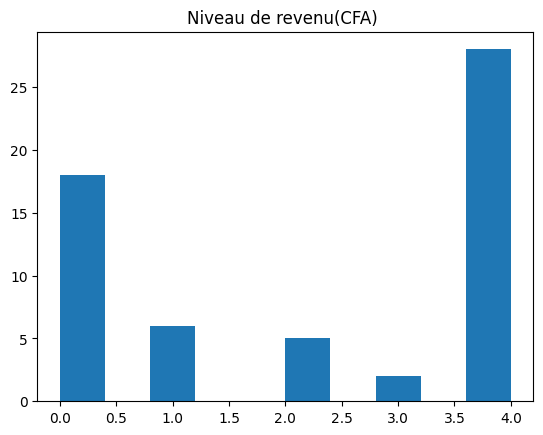

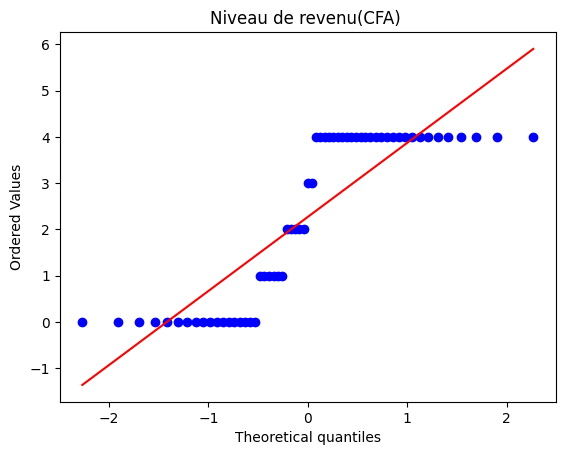

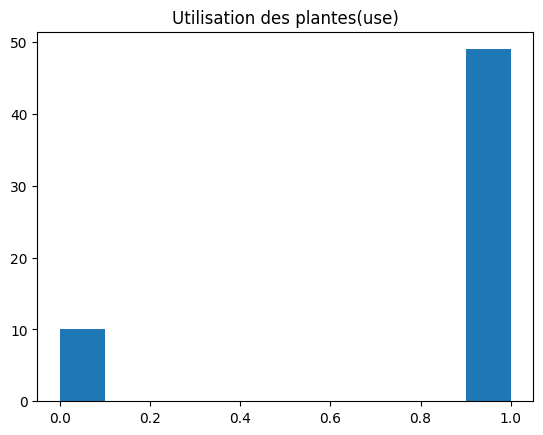

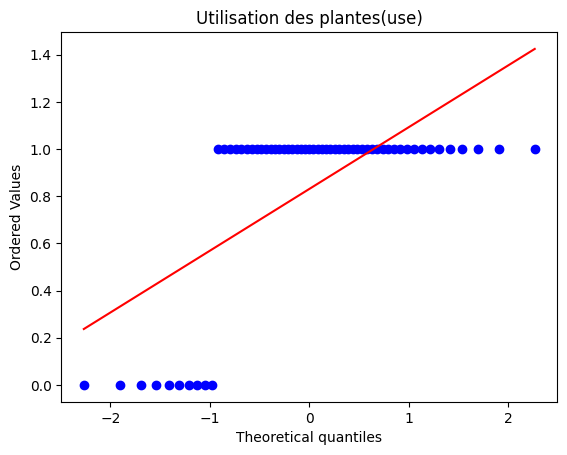

In [21]:
# Check the distribution of the data using histograms and Q-Q plots
for col in df_medecinalplants.columns:
  plt.hist(df_medecinalplants[col])
  plt.title(col)
  plt.show()
  scipy.stats.probplot(df_medecinalplants[col], dist="norm", plot=plt)
  plt.title(col)
  plt.show()

In [23]:
# Separate features (X) and target variable (y)
X = df_medecinalplants.drop('Utilisation des plantes(use)', axis=1)  # Replace 'TargetVariable' with your actual target column
y = df_medecinalplants['Utilisation des plantes(use)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model (example: XGBoost)
model = xgb.XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.40
R-squared: -0.82


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'Usage' is the target variable and it's categorical
X = df_medecinalplants.drop('Utilisation des plantes(use)', axis=1)
y = df_medecinalplants['Utilisation des plantes(use)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a classification model (example: Logistic Regression)
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)


Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# Check for columns related to geospatial information
geo_cols = ['latitude', 'longitude', 'location', 'coordinates', 'geo']
has_geo_info = any(col in df_medecinalplants.columns for col in geo_cols)

if has_geo_info:
  print("DataFrame contains geospatial information.")
  for col in df_medecinalplants.columns:
    if col in geo_cols:
      print(f"Geospatial column found: {col}")
      print(df_medecinalplants[col].head())
else:
  print("No geospatial columns found in the DataFrame.")

No geospatial columns found in the DataFrame.


In [31]:
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'Usage' is the target variable and it's categorical
X = df_medecinalplants.drop('Utilisation des plantes(use)', axis=1)
y = df_medecinalplants['Utilisation des plantes(use)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier
model = AdaBoostClassifier(n_estimators=80, random_state=42)  # You can adjust n_estimators

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Optionally, print a classification report for more detailed metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.64      0.88      0.74         8

    accuracy                           0.58        12
   macro avg       0.32      0.44      0.37        12
weighted avg       0.42      0.58      0.49        12



In [33]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'Usage' is the target variable and it's categorical
X = df_medecinalplants.drop('Utilisation des plantes(use)', axis=1)
y = df_medecinalplants['Utilisation des plantes(use)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Optionally, print a classification report for more detailed metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.67      0.75      0.71         8

    accuracy                           0.58        12
   macro avg       0.50      0.50      0.50        12
weighted avg       0.56      0.58      0.57        12



In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'Utilisation des plantes(use)' is the target variable and it's categorical
X = df_medecinalplants.drop('Utilisation des plantes(use)', axis=1)
y = df_medecinalplants['Utilisation des plantes(use)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

# Make predictions
y_pred = gbm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)


Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
